<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(60608)

In [394]:
print(location.address)

Illinois Medical District, Chicago, Cook County, Illinois, 60608, USA


In [395]:
print(location.latitude,location.longitude)

41.8626357 -87.6687915


In [0]:
f = open(r'testData.txt')

In [0]:
lines = f.readlines()[1:]

In [0]:
loc = []
xx = [] #longitude
yy = [] #latitude
payment = []

In [383]:
#with open('output.csv','rb') as file: 
output = open('outputfile.csv','w')
  for line in lines:
    if(line.find(',')==0):
      line = line[1:]
    _name = line[:line.find(',')]
    print(_name)
    line = line[line.find(',')+1:]
    print(line)
    _dob = line[:line.find(',')]
    print(_dob)
    
    line = line[line.find(',')+1:]
    _houseID = line[:line.find(',')]
    print(_houseID)
    line = line[line.find(',')+1:]
    _houseZip = line[:line.find(',')]
    print(_houseZip)
    line = line[line.find(',')+1:]
    _paymentDate = line[:line.find(',')]
    print(_paymentDate)
    line = line[line.find(',')+1:]
    _paymentAmount = line[:line.find(',')]
    print(_paymentAmount)
    line = line[line.find(',')+1:]
    _rentAmount = line[:line.find('\n')]
    print(_rentAmount)
    location = geolocator.geocode(_houseZip)
    if(location!=None):
      print(location)
      print(location.latitude,location.longitude)
      x = location.latitude,location.longitude
      loc.append(x)
      payment.append(_paymentAmount)
      #file.write(str(x[0]))
      #file.write(x[1])
      file.write(_paymentAmount)
      file.write('\n')

IndentationError: ignored

In [384]:
with open('csvfile.csv','wb') as file:
    for line in text:
        file.write(line)
        file.write('\n')

NameError: ignored

In [0]:
output = open('outputfile.csv','w')
for line in lines:
  if(line.find(',')==0):
    line = line[1:]
  _name = line[:line.find(',')]
  print(_name)
  line = line[line.find(',')+1:]
  print(line)
  _dob = line[:line.find(',')]
  print(_dob)
  line = line[line.find(',')+1:]
  _houseID = line[:line.find(',')]
  print(_houseID)
  line = line[line.find(',')+1:]
  _houseZip = line[:line.find(',')]
  print(_houseZip)
  line = line[line.find(',')+1:]
  _paymentDate = line[:line.find(',')]
  print(_paymentDate)
  line = line[line.find(',')+1:]
  _paymentAmount = line[:line.find(',')]
  if(len(_paymentAmount)>0 ):
    _paymentAmount = float(_paymentAmount)
  else:
    _paymentAmount = 0 
  print(_paymentAmount)
  line = line[line.find(',')+1:]
  _rentAmount = line[:line.find('\n')]
  print(_rentAmount)
  location = geolocator.geocode(_houseZip)
  if(location!=None):
    print(location)
    print(location.latitude,location.longitude)
    x = location.latitude,location.longitude
    #xx = location.latitude
    #yy = location.longitude
    loc.append(x)
    xx.append(location.longitude)
    yy.append(location.latitude)
    payment.append(_paymentAmount)
    output.write(str(x[0]))
    output.write(str(x[1]))
    output.write(str(_paymentAmount))
    output.write('\n')
    
output.close()

In [400]:
testf = open('csvfile.csv','w')

dummylist = [] 

dummylist = ['a','b','c']

for word in dummylist:
  testf.writerows([word])
#testf.write() #Give your csv text here.
## Python will convert \n to os.linesep
testf.close()

AttributeError: ignored

In [0]:
import csv
with open('yourNewFileName.csv', 'w', ) as myfile:
  wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
  dummylist = ['a','b','c']
  wr.writerow(payment)
  #for word in payment:
  #  wr.writerows(str(word))

In [402]:
payment.shape

AttributeError: ignored

In [0]:
import pandas as pd
import numpy as np 

x = np.array([loc,payment])

loc = np.array(loc)
payment = np.array(payment)


In [404]:
loc.shape

(1044, 2)

In [405]:
payment.shape

(1044,)

In [406]:
loc[0]

array([  32.57537127, -117.05482105])

In [407]:
payment[0]

1321.0

In [0]:
df = pd.DataFrame(payment,loc)

In [0]:
df.to_csv('output.csv')

In [410]:
loc.shape

(1044, 2)

In [411]:
payment.shape

(1044,)

In [0]:
mu, sigma = payment.mean(),payment.std()

In [481]:
mu,sigma

(1489.666379310345, 390.91267505798555)

In [0]:
train_x = loc[:1000]
train_y = payment[:1000]

test_x = loc[2000:4000]
test_y = payment[2000:4000]

In [0]:
mu, sigma = train_y.mean(),train_y.std()

In [471]:
mu

2.1316282072803006e-17

In [0]:
sigma = train_y.std()

In [472]:
sigma

0.9999999999999999

In [473]:
mu, sigma 

(2.1316282072803006e-17, 0.9999999999999999)

In [424]:
train_y = train_y-train_y.mean()

test_y = test_y-test_y.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
train_y = (train_y - train_y.mean())/train_y.std()

In [426]:
train_y.mean()

2.1316282072803006e-17

In [427]:
train_y.std()

0.9999999999999999

In [0]:
import keras
from keras import layers
from keras.models import Model
from keras import backend as K 
import numpy as np 
from keras import Input
from keras import Sequential
from keras import models


In [0]:
loc_shape = (2,)

input_loc = keras.Input(shape=loc_shape)

ans = layers.Dense(2,activation='elu',input_shape=(2,))(input_loc)
ans = layers.Dense(2,activation='elu')(ans)
ans = layers.Dense(2,activation='elu')(ans)
ans = layers.Dense(4,activation='elu')(ans)
ans = layers.Dense(3,activation='elu')(ans)
ans = layers.Dense(2,activation='elu')(ans)
#x = layers.LSTM((32))(x)
#shape_before_flattening = K.int_shape(ans)
price = layers.Dense(1,activation='tanh',name='que_pool')(ans)
#price = layers.Dense(1,name='que_pool')(ans)
#z_mean = layers.Dense(10,activation='relu',name='que_pool')(ans)
#price = layers.Dense(latent_dim)(x)

predictor = Model(input_loc,price)

In [0]:
predictor.compile(optimizer='rmsprop',loss='MSE',metrics=['acc'])

In [0]:

predictor.fit(train_x,train_y,epochs=30,batch_size=128)

In [461]:
train_x[0:10]

array([[  32.57537127, -117.05482105],
       [  32.80104208, -117.17296252],
       [  40.7386549 , -121.92305814],
       [  25.1613473 ,   55.4001104 ],
       [  32.68975837, -117.1230124 ],
       [  32.7435126 , -117.1814288 ],
       [  32.87466663, -117.23188884],
       [  32.87466663, -117.23188884],
       [  48.81424969,    2.23365554],
       [  48.81424969,    2.23365554]])

In [462]:
train_y[0:10]

array([-0.41467743,  2.04279519, -0.11510949,  0.65919748, -0.03387073,
       -0.63808404,  0.92830089,  0.2606198 ,  1.1313978 ,  0.28600691])

In [463]:
payment[0:10]

array([1321., 2289., 1439., 1744., 1471., 1233., 1850., 1587., 1930.,
       1597.])

In [0]:
result = predictor.predict(train_x[0:10])

In [483]:
result 

array([[ 0.02628339],
       [ 0.02628339],
       [ 0.02628339],
       [-0.04336611],
       [ 0.02628339],
       [ 0.02628339],
       [ 0.02628339],
       [ 0.02628339],
       [-0.02150292],
       [-0.02150292]], dtype=float32)

In [0]:
result = result*sigma+mu

In [485]:
mu

1489.666379310345

In [486]:
result

array([[1499.9409],
       [1499.9409],
       [1499.9409],
       [1472.714 ],
       [1499.9409],
       [1499.9409],
       [1499.9409],
       [1499.9409],
       [1481.2606],
       [1481.2606]], dtype=float32)

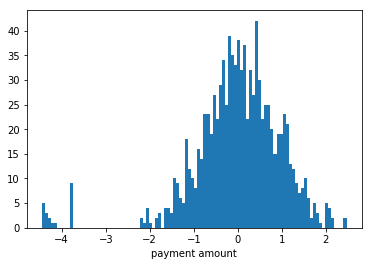

In [438]:
import matplotlib.pyplot as plt 

#payment.hist(bins=100,figsize=(20,15))
#payment.histogram(payment.arange(4), bins=np.arange(5), density=True)
plt.xlabel("payment amount")
plt.hist(train_y,bins=100)
plt.show()

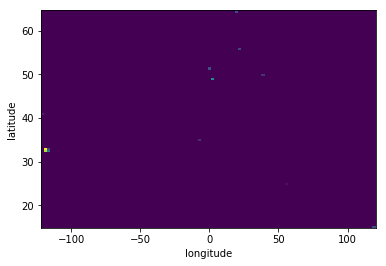

In [439]:
plt.hist2d(xx,yy,bins=100,weights=payment)
#plt.axis([-200,200,0,80])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()